In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('datacount7.csv')

In [3]:
df['y'] = df['y'].astype(float)

In [4]:
train = df[df['ds']<'2023-07-01']
test = df[df['ds']>='2023-07-01']

In [5]:
y_train =train[['y']]
y_test =test[['y']] 

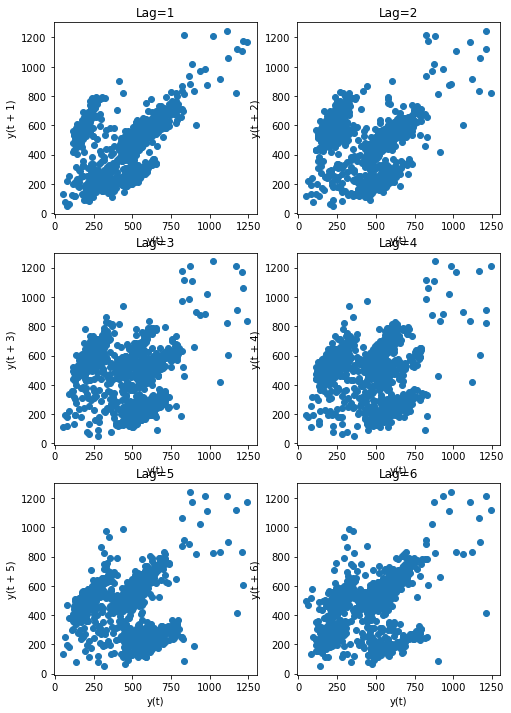

In [6]:
from pandas.plotting import lag_plot

fig, axes = plt.subplots(3, 2, figsize=(8, 12))
plt.title('MSFT Autocorrelation plot')

# The axis coordinates for the plots
ax_idcs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1),
    (2, 0),
    (2, 1)
]

for lag, ax_coords in enumerate(ax_idcs, 1):
    ax_row, ax_col = ax_coords
    axis = axes[ax_row][ax_col]
    lag_plot(df["y"], lag=lag, ax=axis)
    axis.set_title(f"Lag={lag}")

plt.show()

In [7]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")
# Estimated differencing term: 1

Estimated differencing term: 1


In [8]:
auto = pm.auto_arima(y_train, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11619.906, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11621.484, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11600.439, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11617.907, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11316.413, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11316.851, Time=0.19 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 3.019 seconds


In [9]:
print(auto.order)
# (0, 1, 0)

(0, 1, 2)
